Image shape: (800, 800, 3)
Image shape: (800, 800)


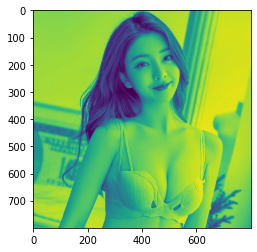

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
import urllib.request
from io import BytesIO

%matplotlib inline

url = str('https://www.dhresource.com/0x0/f2/albu/g9/M00/40/BD/rBVaWF25ZpGAebuwAALXr4IE_ws160.jpg')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

X = np.array(Image.open(f))
print('Image shape: %s'%str(X.shape))
# Convert to grey
X = X.dot([0.299, 0.5870, 0.114])
# X = X.dot([1,1,1])
print('Image shape: %s'%str(X.shape))
plt.imshow(X)

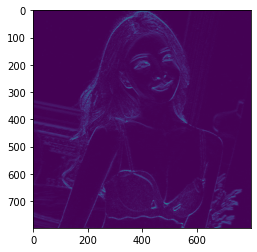

In [2]:
#Tạo bộ lọc ngang F1
F1 = np.array([[-1, -1, -1],
              [0, 0, 0],
              [1, 1, 1]])
#Tính tích chập 2 chiều.
def conv2d(X, F, s = 1, p = 0):
    """
    X: Ma trận đầu vào
    F: Ma trận bộ lọc
    s: Bước trượt
    p: Độ rộng lề thêm vào
    """
    (w1, h1) = X.shape
    f = F.shape[0]
    w2 = int((w1 + 2*p - f)/s) + 1
    h2 = int((h1 + 2*p - f)/s) + 1
    Y = np.zeros((w2, h2))
    X_pad = np.pad(X, pad_width = p, mode = 'constant', constant_values = 0)
    for i in range(w2):
        for j in range(h2):
            idw = i*s
            idh = j*s
            Y[i, j] = np.abs(np.sum(X_pad[idw:(idw+f), idh:(idh+f)]*F))
    return Y

Y1 = conv2d(X, F1, s = 1, p = 0)
plt.imshow(Y1)

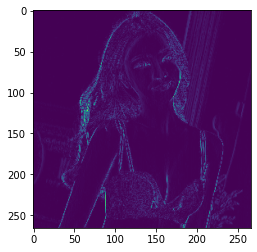

In [3]:
#Tạo bộ lọc dọc F2
F2 = np.array([[1, 0, -1],
             [1, 0, -1],
             [1, 0, -1]])
Y2 = conv2d(X, F2, s = 3, p = 0)
plt.imshow(Y2)